Hypothesis 1: Sleep Duration 
Does the user sleep longer on weekends than on weekdays?

Null Hypothesis: The average total hours of sleep on weekends is equal to the average total hours of sleep on weekdays.
μ(weekend_sleep)=μ(weekday_sleep)

Alternative Hypothesis: The average total hours of sleep on weekends is different from  the average total hours of sleep on weekdays.
μ(weekend_sleep)!=μ(weekday_sleep)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
sleep = pd.read_csv('sleep_cleaned.csv')
sleep_weekend=sleep[sleep['is_weekend']==True]
sleep_weekday= sleep[sleep['is_weekend']==False]

In [16]:
mean_weekend = round(sleep_weekend['total_hrs'].mean(),2)
mean_weekday= round(sleep_weekday['total_hrs'].mean(),2)
print(f'Mean_weekend_sleep: {mean_weekend},mean_weekday_sleep:{mean_weekday}')

Mean_weekend_sleep: 8.73,mean_weekday_sleep:8.78


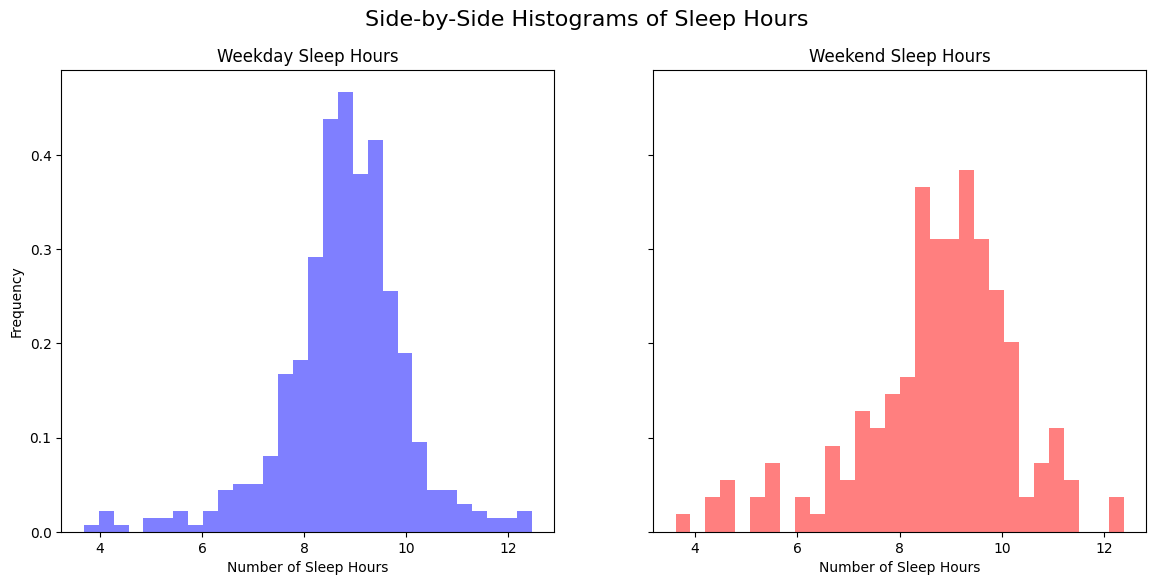

In [17]:
# Want to use a t-test for 2 independent samples, checking for assumptions. Check if distributions are normal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
ax1.hist(sleep_weekday['total_hrs'], bins=30,alpha=0.5, label='Weekday', color='blue',density=True)
ax1.set_title('Weekday Sleep Hours')
ax1.set_xlabel('Number of Sleep Hours')
ax1.set_ylabel('Frequency')
ax2.hist(sleep_weekend['total_hrs'], bins =30,alpha=0.5, label='Weekend', color='red',density=True)
ax2.set_title('Weekend Sleep Hours')
ax2.set_xlabel('Number of Sleep Hours')
plt.suptitle('Side-by-Side Histograms of Sleep Hours', fontsize=16)
plt.show()

In [18]:
# Checking variances, they should be similar
print(f'Sleep variance on weekend:{round(np.var(sleep_weekend['total_hrs']),2)}, sleep variance on weekday: {round(np.var(sleep_weekday['total_hrs']),2)}')


Sleep variance on weekend:2.31, sleep variance on weekday: 1.45


In [19]:
#Not sure about their similarity, had to perform Levene's test to understand which t-test to use
print(stats.levene(sleep_weekend['total_hrs'], sleep_weekday['total_hrs']))

LeveneResult(statistic=np.float64(11.511468671905046), pvalue=np.float64(0.0007334696764475558))


In [20]:
#Variances are not equal, using Welch’s t-test
t_stat, p_ttest = stats.ttest_ind(sleep_weekend['total_hrs'], sleep_weekday['total_hrs'], equal_var=False)
# Print the final t-test result
print(f"T-test p-value: {round(p_ttest,2)}")
if p_ttest < 0.05:
    print("The difference in sleep hours is statistically significant.")
else:
    print("The difference in sleep hours is not statistically significant.")

T-test p-value: 0.71
The difference in sleep hours is not statistically significant.


Hypothesis 2: Physical Activity

Is the user more physically active (in terms of steps) on weekdays than on weekends?

Null Hypothesis: The average number of daily steps on weekdays is equal to the average number of daily steps on weekends.
μ(weekday_steps=μ(weekend_steps)

Alternative Hypothesis: The average number of daily steps on weekdays is not equal to the average number of daily steps on weekends.
μ(weekday_steps)=μ(weekend_steps).


In [21]:
activity = pd.read_csv('activity_cleaned.csv')

In [22]:
activity_weekend=activity [activity['is_weekend']==True]
activity_weekday= activity[activity['is_weekend']==False]

In [91]:
mean_act_weekday= activity_weekday['steps'].mean()
mean_act_weekend= activity_weekend['steps'].mean()
print(f'Average steps on weekday: {round(mean_act_weekday)}, average steps on weekend: {round(mean_act_weekend)}')

Average steps on weekday: 5102, average steps on weekend: 9448


In [35]:
# Checking variances, they should be similar
print(f'Steps variance on weekday:{round(np.var(activity_weekday['steps']))}, steps variance on weekend: {round(np.var(activity_weekend['steps']))}')


Steps variance on weekday:15649139, steps variance on weekend: 31456812


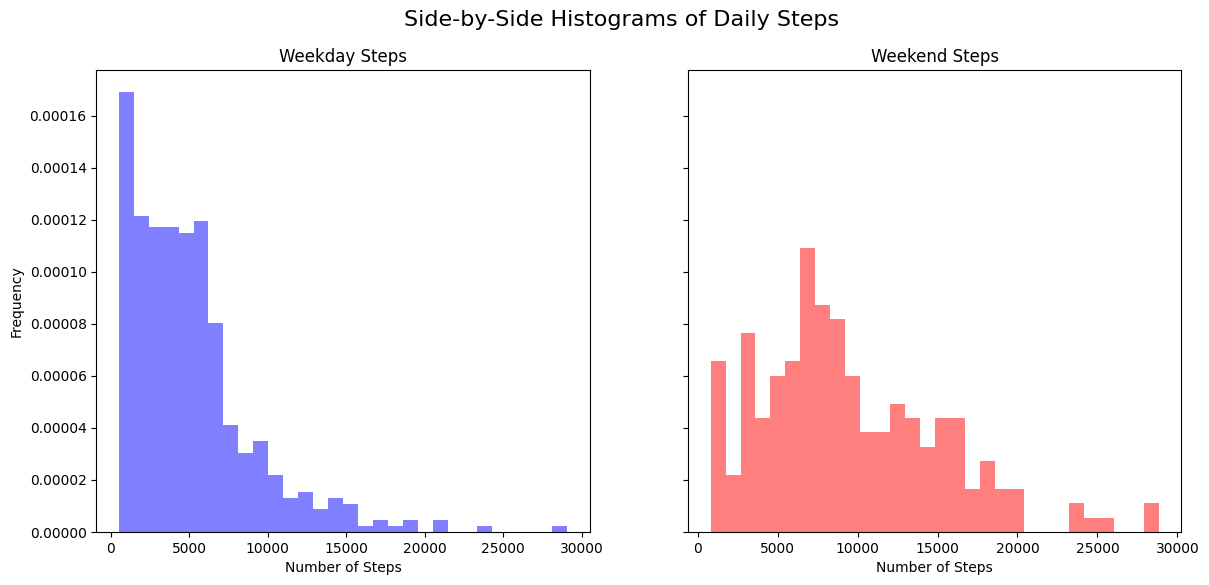

In [89]:
# Checking if distributions are normal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
ax1.hist(activity_weekday['steps'], bins =30,alpha=0.5, label='Weekday', color='blue', density=True)
ax1.set_title('Weekday Steps')
ax1.set_xlabel('Number of Steps')
ax1.set_ylabel('Frequency')
ax2.hist(activity_weekend['steps'], bins =30,alpha=0.5, label='Weekend', color='red', density=True)
ax2.set_title('Weekend Steps')
ax2.set_xlabel('Number of Steps')
plt.suptitle('Side-by-Side Histograms of Daily Steps', fontsize=16)
plt.show()

In [87]:
#Deciding on using Welch’s t-test
stat, p_value = stats.ttest_ind(activity_weekend['steps'], activity_weekday['steps'], equal_var=False)
print(f'P value={p_value}')
if p_value < 0.05:
    print('The difference between steps on weekday and weekend is statistically significant')
else:
    print('The difference between steps on weekday and weekend is not statistically significant')

P value=6.816931888481181e-20
The difference between steps on weekday and weekend is statistically significant


Hypothesis 3: Activity's Impact on Sleep Quality

Is there a significant correlation between daily physical activity and sleep quality? 
Specifically, does a higher number of steps in a day correlate with a greater amount of sleep that night?

Null Hypothesis: There is no correlation between the number of steps taken in a day and the minutes of sleep during the following night.

Alternative Hypothesis: There is a positive correlation between the number of steps taken in a day and the minutes of sleep during the following night.


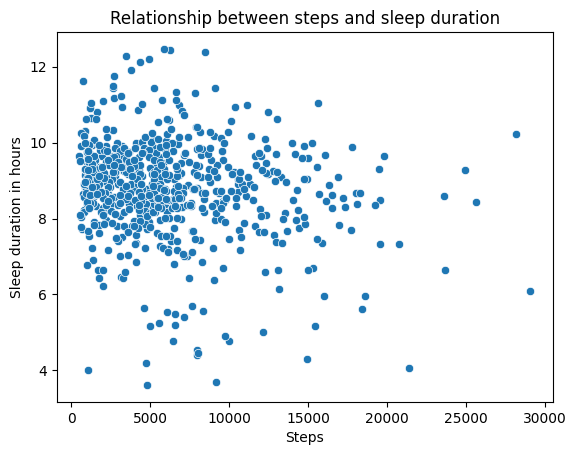

In [44]:
import seaborn as sns
merged= pd.read_csv('merged_file.csv')
sns.scatterplot(data=merged,x='steps', y='total_hrs')
plt.title('Relationship between steps and sleep duration')
plt.xlabel('Steps')
plt.ylabel('Sleep duration in hours')
plt.show()

In [55]:
#Calculation of Spearman’s rank correlation coefficient (better fit here since data is not normally distributed)
corr, p = stats.spearmanr(merged['steps'], merged['total_hrs'],nan_policy='omit')
print(f'Coefficient of correlation is {round(corr,2)}, the p-value is {round(p,4)}')
if p < 0.05:
    if corr > 0: 
        print('There is a positive correlation between number of steps and duration of sleep, the null hypothesis can be rejected.')
    else:
        print('There is a negative correlation between number of steps and duration of sleep, the null hypothesis can be rejected.')
else:
    print('The null hypothesis cannot be rejected, the results are not statistically significant.') 

Coefficient of correlation is -0.14, the p-value is 0.0005
There is a negative correlation between number of steps and duration of sleep, the null hypothesis can be rejected.


Hypothesis 4: Activity's Impact on Heart Rate

Is there a relationship between how intensely a user exercises (running distance) and their average heart rate?

Null Hypothesis: There is no correlation between the running distance for a given day and the average heart rate for that day.


Alternative Hypothesis: There is a positive correlation between running distance and the average daily heart rate.

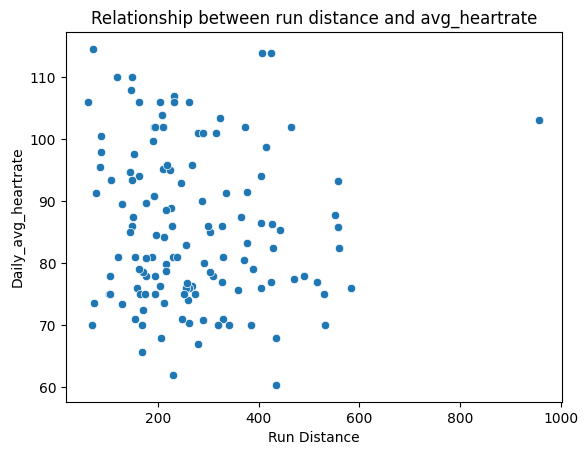

In [70]:
#Visualising correlation through scatterplot
sns.scatterplot(data=merged,x='runDistance', y='avg_hr')
plt.title('Relationship between run distance and avg_heartrate')
plt.xlabel('Run Distance')
plt.ylabel('Daily_avg_heartrate')
plt.show()

In [73]:
#Calculation of Spearman’s rank correlation coefficient (better fit here since data is not normally distributed)
corr, p = stats.spearmanr(merged['runDistance'], merged['avg_hr'],nan_policy='omit')
print(f'Coefficient of correlation is {round(corr,2)}, the p-value is {round(p,2)}')
if p < 0.05:
    if corr > 0: 
        print('There is a positive correlation between number of steps and duration of sleep, the null hypothesis can be rejected.')
    else:
        print('There is a negative correlation between number of steps and duration of sleep, the null hypothesis can be rejected.')
else:
    print('The null hypothesis cannot be rejected, the results are not statistically significant.') 

Coefficient of correlation is -0.1, the p-value is 0.24
The null hypothesis cannot be rejected, the results are not statistically significant.
